In [ ]:
from google.colab import files
uploaded = files.upload()


Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc


In [ ]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

print("Train data shape:", train_df.shape)
print("Test data shape:", test_df.shape)


Train data shape: (103904, 25)
Test data shape: (25976, 25)


In [ ]:
train_df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
test_df.tail()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied
25975,25975,34799,Female,Loyal Customer,42,Personal Travel,Eco,264,2,5,...,1,1,2,1,1,1,1,0,0.0,neutral or dissatisfied


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [ ]:
print(train_df.isnull().sum())

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [ ]:
train_df['satisfaction'].value_counts(normalize=True) * 100

,proportion
satisfaction,
neutral or dissatisfied,56.666731
satisfied,43.333269


<ipython-input-50-8734b9c33f37>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x='satisfaction', palette='viridis')


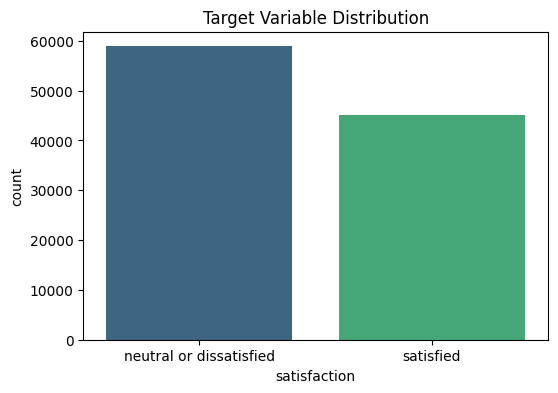

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=train_df, x='satisfaction', palette='viridis')
plt.title("Target Variable Distribution")
plt.show()


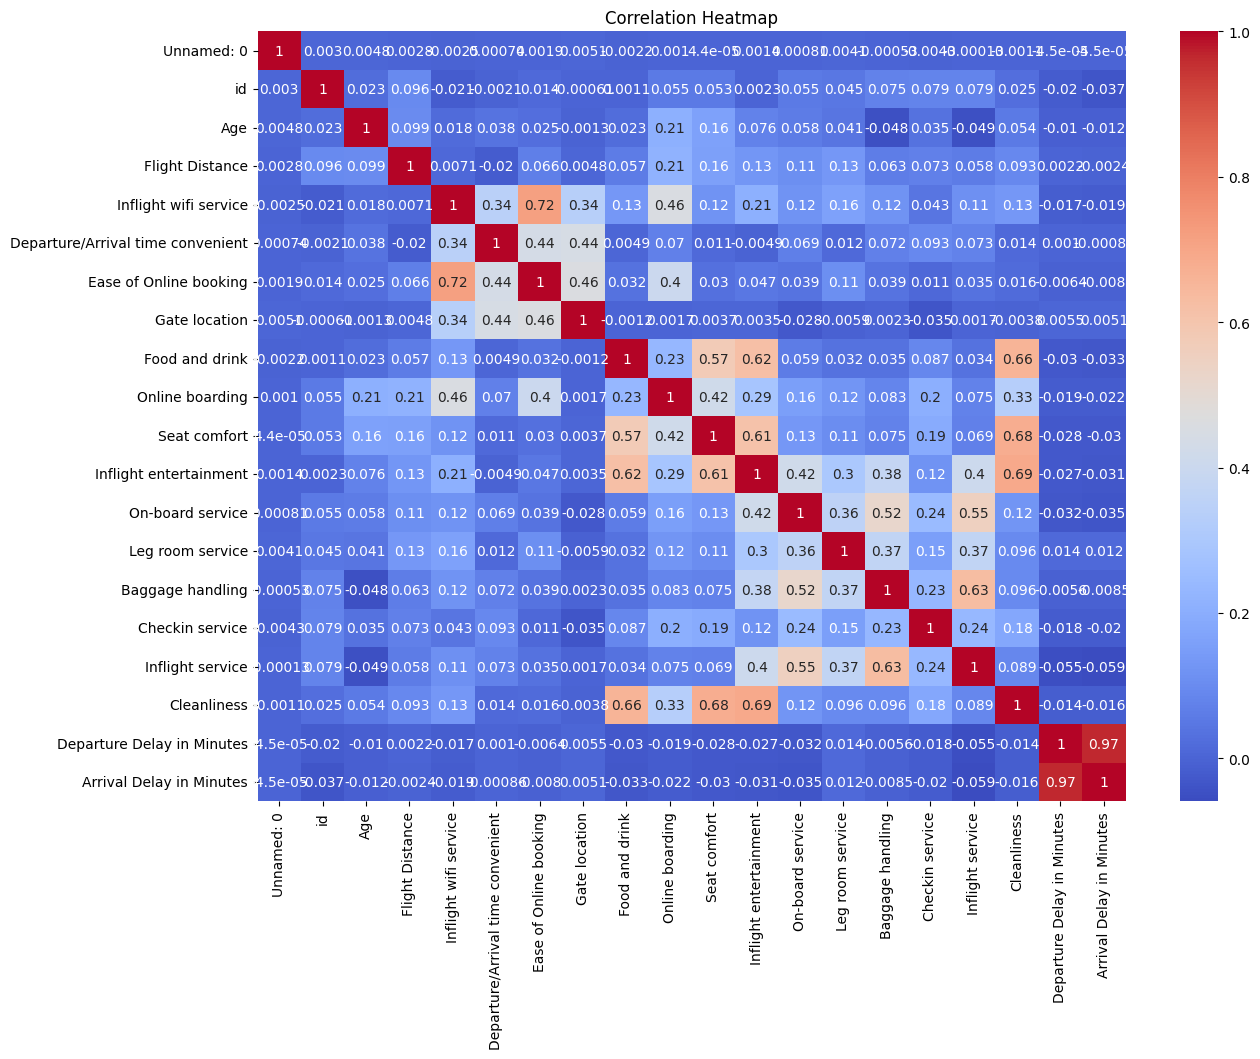

In [ ]:
plt.figure(figsize=(14, 10))
sns.heatmap(train_df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
columns_to_drop = ['Unnamed: 0', 'id']
train_df.drop(columns=columns_to_drop, axis=1, inplace=True)
test_df.drop(columns=columns_to_drop, axis=1, inplace=True)

print("Remaining columns:", train_df.columns.tolist())


Remaining columns: ['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction']


In [ ]:
test_df.dropna(inplace=True)

print(train_df['satisfaction'].value_counts(normalize=True) * 100)


satisfaction
neutral or dissatisfied    56.666731
satisfied                  43.333269
Name: proportion, dtype: float64


In [ ]:
train_df['satisfaction'] = train_df['satisfaction'].map({
    'satisfied': 1,
    'neutral or dissatisfied': 0
})
test_df['satisfaction'] = test_df['satisfaction'].map({
    'satisfied': 1,
    'neutral or dissatisfied': 0
})

print(train_df['satisfaction'].value_counts(normalize=True) * 100)
print(test_df['satisfaction'].value_counts(normalize=True) * 100)

satisfaction
0    56.666731
1    43.333269
Name: proportion, dtype: float64
satisfaction
0    56.107828
1    43.892172
Name: proportion, dtype: float64


In [ ]:
print("Missing values before handling:\n")
print(train_df.isnull().sum())

numeric_columns = train_df.select_dtypes(include=['float64', 'int64']).columns
train_df[numeric_columns] = train_df[numeric_columns].fillna(train_df[numeric_columns].median())

test_df[numeric_columns] = test_df[numeric_columns].fillna(test_df[numeric_columns].median())

print("\nMissing values after handling:\n")
print(train_df.isnull().sum())


Missing values before handling:

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

Missing values after handling:

Gender                  

In [ ]:
label_encoders = {}

categorical_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

for col in categorical_cols:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])
    test_df[col] = le.transform(test_df[col])
    label_encoders[col] = le


In [ ]:
X = train_df.drop('satisfaction', axis=1)
y = train_df['satisfaction']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)


Training set shape: (83123, 22)
Validation set shape: (20781, 22)


In [ ]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    class_weight='balanced'
)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", round(accuracy * 100, 2), "%")


Validation Accuracy: 96.18 %


In [ ]:
print(classification_report(y_val, y_pred))



              precision    recall  f1-score   support

           0       0.96      0.98      0.97     11776
           1       0.97      0.94      0.96      9005

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781



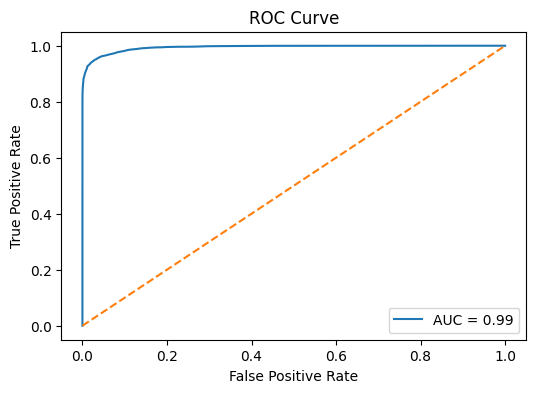

In [ ]:
y_proba = rf_model.predict_proba(X_val)[:, 1]
fpr, tpr, _ = roc_curve(y_val, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


In [ ]:
X_test = test_df.drop('satisfaction', axis=1)
y_test = test_df['satisfaction']

y_test_pred = rf_model.predict(X_test)

print("Final Evaluation on Test Set:")
print("Accuracy:", round(accuracy_score(y_test, y_test_pred) * 100, 2), "%")
print("\nClassification Report:\n")
print(classification_report(y_test, y_test_pred))


Final Evaluation on Test Set:
Accuracy: 96.18 %

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14528
           1       0.97      0.94      0.96     11365

    accuracy                           0.96     25893
   macro avg       0.96      0.96      0.96     25893
weighted avg       0.96      0.96      0.96     25893



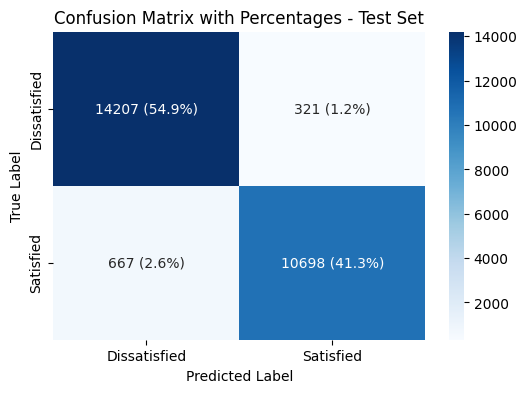

In [ ]:
import numpy as np

cm = confusion_matrix(y_test, y_test_pred)
cm_sum = np.sum(cm)
cm_percent = cm / cm_sum * 100

labels = np.array([
    [f"{cm[0,0]} ({cm_percent[0,0]:.1f}%)", f"{cm[0,1]} ({cm_percent[0,1]:.1f}%)"],
    [f"{cm[1,0]} ({cm_percent[1,0]:.1f}%)", f"{cm[1,1]} ({cm_percent[1,1]:.1f}%)"]
])

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', xticklabels=['Dissatisfied', 'Satisfied'], yticklabels=['Dissatisfied', 'Satisfied'])
plt.title("Confusion Matrix with Percentages - Test Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
